In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c

import iminuit 
from iminuit import Minuit, cost
import ROOT

import mplhep as hep
mpl.style.use(hep.style.ATLAS)




Welcome to JupyROOT 6.24/02


    mpl.rcParams['font.size'] = 8
    mpl.rcParams['figure.dpi'] = 200

Analisi per ottenere valore di $\gamma$. Conosciamo la relazione di fit che è $$ I = \alpha\cdot V^{\frac{4\gamma-1}{4\gamma+1}} $$

In [10]:
V, μ_I, σ_I = np.loadtxt('lamp.txt', unpack=True)

def f(V, α, γ):
    return α*(V**((4*γ-1)/(4*γ+1)))

χ2= cost.LeastSquares(V, μ_I, σ_I, model=f)

m_γ = Minuit(χ2, α=1e-2, γ=0.8)
m_γ.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.791e+04 (chi2/ndof = 182.7)│              Nfcn = 61               │
│ EDM = 5.43e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │11.9805e-3 │ 0.0027e-3 │            │            │         │         │       │
│ 1 │ γ    │ 877.69e-3 │  0.24e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         α         γ │
├───┼─────────────────────┤
│ α │  7.22e-12 -6.12e-10 │
│ γ │ -6.12e-10  5.68e-08 │
└───┴─────────────────────┘

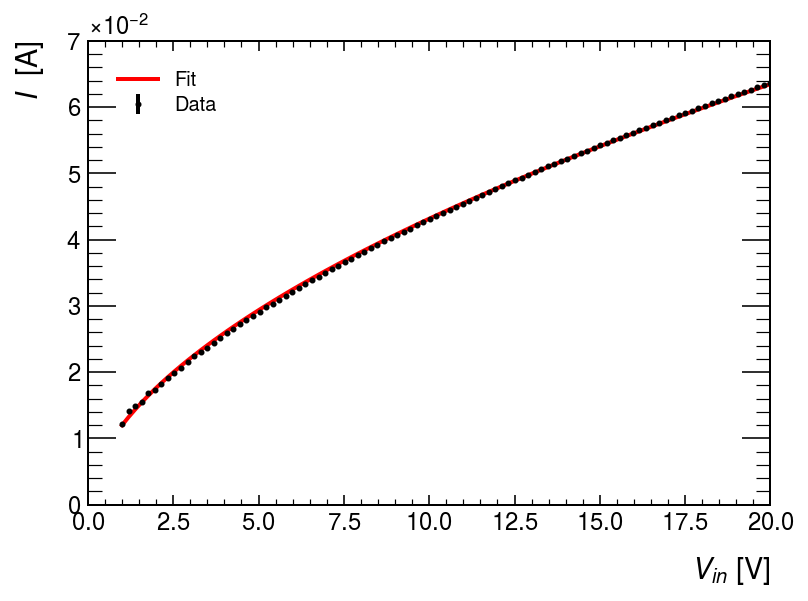

In [13]:
fig, ax = plt.subplots()

ax.set_xlabel('$V_{in}$ [V]')
ax.set_ylabel('$I$  [A]')
ax.errorbar(V, μ_I, σ_I, fmt='k.', markersize=4, label='Data')
ax.plot(V, f(V, *m_γ.values), 'r', label='Fit')
ax.legend()

In [14]:
fig.savefig('../report/fig/gamma_plot.pdf', bbox_inches='tight')

In [15]:
γ, σ_γ = m_γ.values['γ'], m_γ.errors['γ']

from uncertainties import ufloat
print(f'γ = {ufloat(γ, σ_γ):.3uS}')

γ = 0.877687(238)


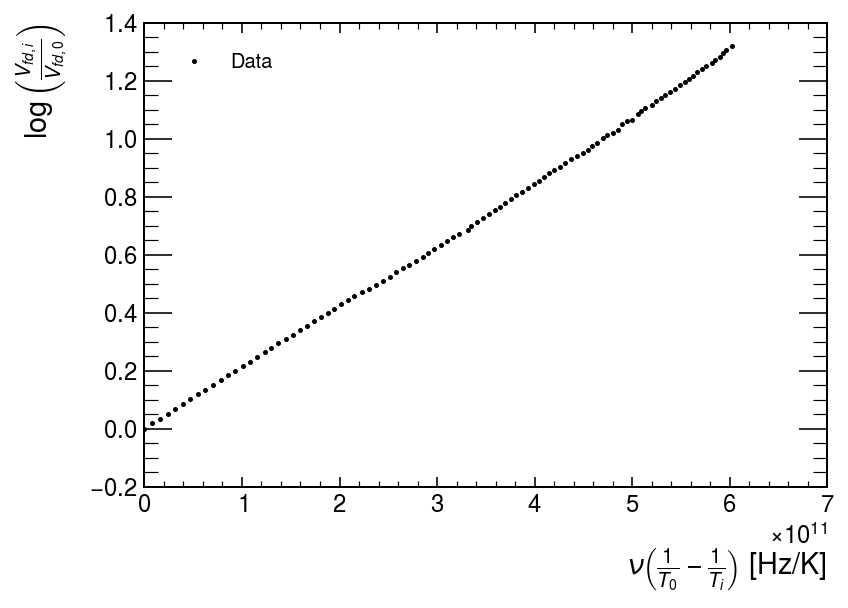

In [16]:
def T(T_amb, R_amb, V, I, γ):
    return T_amb * ( V/(I*R_amb) )**γ


V, μ_I, σ_I, μ_Vfd, σ_Vfd = np.loadtxt('ph_diode.txt', unpack=True)

T_amb = 20
R_amb, σ_R_amb = 25.045, 0.21551350000000002

ν, σ_ν = c/450e-9, (10/(2*np.log(2+np.sqrt(3))))*c/450e-9**2

T = T(T_amb, R_amb, V, μ_I, γ)

def log(i, j):
    return np.log(μ_Vfd[i]/μ_Vfd[j])

def Tij(i, j):
    return ν*(1/T[j]-1/T[i])

j: int = 0
LOG = np.array([log(i, j) for i in range(len(μ_Vfd))])
TEMP_DIFF =  np.array([Tij(i, j) for i in range(len(V))])

fig, ax = plt.subplots()
ax.set_xlabel(r'$\nu\left(\frac{1}{T_%d} - \frac{1}{T_i}\right)$ [Hz/K]'%j, labelpad=15)
ax.set_ylabel(r'$\log\left(\frac{V_{fd,i}}{V_{fd,%d}}\right)$'%j)
ax.plot(TEMP_DIFF, LOG, 'k.', markersize=3, label='Data')
ax.legend()